# Import Library

In [17]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [18]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [19]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [20]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

Using TensorFlow backend.


In [4]:
model = Sequential()

In [8]:
#卷積層1

In [5]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [6]:
model.add(Dropout(rate=0.25))

In [7]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [8]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [9]:
model.add(Dropout(0.25))

In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [11]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [12]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [13]:
model.add(Dense(10, activation='softmax'))

In [43]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [44]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# 訓練模型

# 作業: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

In [23]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [24]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)    

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 942s 24ms/step - loss: 0.0897 - acc: 0.1270 - val_loss: 0.0893 - val_acc: 0.1739
Epoch 2/10
40000/40000 [==============================] - 948s 24ms/step - loss: 0.0887 - acc: 0.1655 - val_loss: 0.0884 - val_acc: 0.2257
Epoch 3/10
40000/40000 [==============================] - 942s 24ms/step - loss: 0.0871 - acc: 0.2064 - val_loss: 0.0869 - val_acc: 0.2584
Epoch 4/10
40000/40000 [==============================] - 941s 24ms/step - loss: 0.0851 - acc: 0.2444 - val_loss: 0.0852 - val_acc: 0.2808
Epoch 5/10
40000/40000 [==============================] - 948s 24ms/step - loss: 0.0835 - acc: 0.2685 - val_loss: 0.0839 - val_acc: 0.3045
Epoch 6/10
40000/40000 [==============================] - 946s 24ms/step - loss: 0.0824 - acc: 0.2919 - val_loss: 0.0831 - val_acc: 0.3190
Epoch 7/10
40000/40000 [==============================] - 947s 24ms/step - loss: 0.0813 - acc: 0.3077 - val_loss: 0.

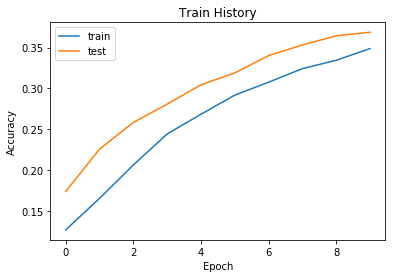

In [25]:
show_train_history('acc','val_acc')

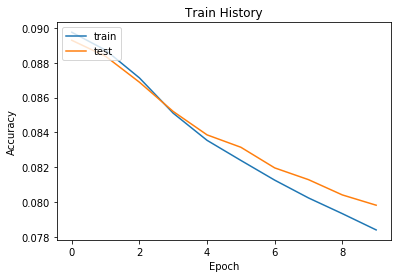

In [26]:
show_train_history('loss','val_loss')

In [21]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 893s 22ms/step - loss: 0.3070 - acc: 0.9002 - val_loss: 0.2946 - val_acc: 0.9000
Epoch 2/10
40000/40000 [==============================] - 890s 22ms/step - loss: 0.2826 - acc: 0.9010 - val_loss: 0.2822 - val_acc: 0.9002
Epoch 3/10
40000/40000 [==============================] - 897s 22ms/step - loss: 0.2688 - acc: 0.9029 - val_loss: 0.2702 - val_acc: 0.9006
Epoch 4/10
40000/40000 [==============================] - 930s 23ms/step - loss: 0.2561 - acc: 0.9050 - val_loss: 0.2584 - val_acc: 0.9020
Epoch 5/10
40000/40000 [==============================] - 928s 23ms/step - loss: 0.2458 - acc: 0.9072 - val_loss: 0.2496 - val_acc: 0.9036
Epoch 6/10
40000/40000 [==============================] - 923s 23ms/step - loss: 0.2381 - acc: 0.9092 - val_loss: 0.2424 - val_acc: 0.9051
Epoch 7/10
40000/40000 [==============================] - 922s 23ms/step - loss: 0.2321 - acc: 0.9116 - val_loss: 0.

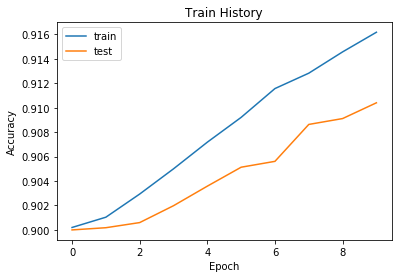

In [22]:
show_train_history('acc','val_acc')

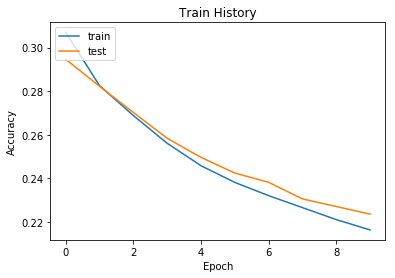

In [23]:
show_train_history('loss','val_loss')